# Dépendance

In [49]:
import seaborn as sns
import pandas as pd
import warnings
import numpy as np

from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.ensemble import RandomForestClassifier as RFC
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Variable et dataset

In [6]:
ip = pd.read_csv("data/IpAddress_to_Country.csv")
fraud = pd.read_csv("data/Fraud_Data.csv")

# Function

In [5]:
accuracy = lambda p,y: (p==y).sum()/p.shape[0]

In [18]:
# Fonction de merge des deux datasets qui sera executé dans un apply

# source: Demange Aymeric 

def IP_to_country(ips) :
    try :
        return ip.country[(ip.lower_bound_ip_address <= ips)
                                & 
                                (ip.upper_bound_ip_address >= ips)].iloc[0]
    except IndexError :
        return "Unknown"

In [38]:
def rfc_predict(X,Y,size=0.2, seed=777):
    splits = TTS(X,
                 Y,
                 train_size=size,
                 stratify=Y,
                 random_state=seed
                )
    X_train, X_test, Y_train, Y_test = splits
    rfc = RFC()
    rfc.fit(X_train, Y_train)
    prediction = rfc.predict(X_test)
    proba = rfc.predict_proba(X_test)
    print(accuracy(prediction, Y_test))
    print()
    print(proba)
    return (X_train, X_test, Y_train, Y_test, proba)


# Notebook

In [7]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [8]:
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [9]:
# Suppression de toutes les variables non numérique (Variable null)
fraud = fraud.dropna()
ip = ip.dropna()

In [19]:
clean = fraud.copy()
clean["IP_country"] = clean.ip_address.apply(IP_to_country)

In [20]:
# Label Encoder
le = LE()
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
 11  IP_country      151112 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 15.0+ MB


# Cleaning

In [22]:
# Suppression des valeurs Unknown dans la colonne country
# Source: Aymeric DEMANGE
clean = clean[clean.IP_country != 'Unknown']

In [23]:
# Isolation de la variable Target
Y = clean['class']
Y

0         0
1         0
2         1
4         0
5         0
         ..
151106    0
151107    1
151108    0
151109    0
151110    0
Name: class, Length: 129146, dtype: int64

In [24]:
# Isolation des features en supprimant la target et l'adresse IP qui n'a plus d'interet ici 
X = clean.drop(['ip_address','class'], axis = 1)
X

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,IP_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,United States
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,Canada
...,...,...,...,...,...,...,...,...,...,...
151106,360761,2015-02-10 06:39:44,2015-06-03 08:18:30,13,EFCFFMUKFRDHJ,SEO,Safari,F,42,United States
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,Japan


In [26]:
# Transformation des valeurs quantitative (Ex: String) en valeur qualitative (Ex: Int)

X['device_id'] = le.fit_transform(X['device_id'])
X['browser'] = le.fit_transform(X['browser'])
X['sex'] = le.fit_transform(X['sex'])
X['source'] = le.fit_transform(X['source'])
X['purchase_time'] = pd.to_datetime(X['purchase_time']).astype(int)/ 10**9
X['signup_time'] = pd.to_datetime(X['signup_time']).astype(int)/ 10**9
X['IP_country'] = le.fit_transform(X['IP_country'])

In [27]:
# Export des données pour ne sautez les étapes précedentes
clean.to_csv("data/fraud_clean.csv")

# Modèle Random Forest

In [39]:
X_train, X_test, Y_train, Y_test, proba = rfc_predict(X,Y)

0.9548960964797661

[[0.94 0.06]
 [0.87 0.13]
 [0.98 0.02]
 ...
 [0.97 0.03]
 [0.97 0.03]
 [0.99 0.01]]


In [40]:
X_test

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,IP_country
82028,34258,1.435743e+09,1.441774e+09,59,92792,1,1,1,35,171
47158,3391,1.436561e+09,1.436855e+09,49,105860,2,4,0,34,171
122749,51627,1.437802e+09,1.445793e+09,31,14796,2,2,0,33,7
94925,391235,1.420908e+09,1.424239e+09,30,87155,0,0,0,29,171
7043,317082,1.420909e+09,1.420909e+09,19,75803,0,0,0,24,60
...,...,...,...,...,...,...,...,...,...,...
1177,178211,1.431867e+09,1.433736e+09,45,18626,0,0,1,27,171
87480,283333,1.426966e+09,1.436104e+09,45,117221,0,4,1,35,170
104336,112269,1.427861e+09,1.431616e+09,50,56840,2,0,1,43,52
148578,40090,1.439731e+09,1.446035e+09,24,78563,0,4,1,37,36


In [41]:
Y_test

82028     0
47158     0
122749    0
94925     0
7043      1
         ..
1177      0
87480     0
104336    0
148578    0
69458     0
Name: class, Length: 103317, dtype: int64

# Courbe ROC et AUC score

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [43]:
n_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test, proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [44]:
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), proba[:, i].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

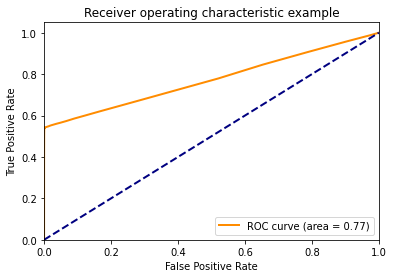

In [47]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [50]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

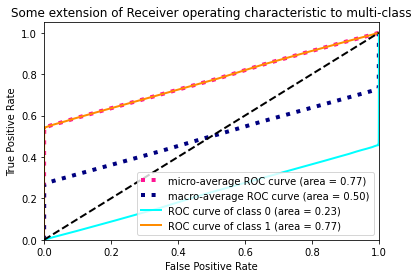

In [51]:
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()